In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# 1.來觀察地區房價走勢

####  建立一個 def 來繪製房價走勢圖

In [69]:
def plot_average_price_trend(data_path, save_path):
    data = pd.read_excel(data_path)
    #先將年與月份合併成另一個有年月份的資料欄位
    data['YearMonth'] = pd.to_datetime(data['YrSold'].astype(str) + '-' + data['MoSold'].astype(str))
    
    #以年月份為索引，計算售價平均值
    average_price_bydate = data.groupby('YearMonth')['SalePrice'].mean()
    
    ## 製作折線圖
    # 設定 Matplotlib樣式
    plt.figure(figsize=(10, 6))                 # 設定圖片大小
    plt.rcParams['axes.facecolor'] = 'dimgray'  # 將繪製區域變成灰色背景
    # 繪製折線圖
    plt.plot(average_price_bydate.index,  # 指定 X 軸數據，即日期
            average_price_bydate.values,  # 指定 Y 軸數據，即平均售價
            marker = 'o',      # 指定折線部分的樣式， 'o' 為圓點
            linestyle = '-',   # 指定折線的樣式， '-' 為實線
            color = 'white')       # 指定折線顏色，這裡使用藍色
    
    plt.title('1-House Price Trends', 
              color = 'white',       # 設定標題顏色
              size = 20)             # 設定字體大小
    
    plt.xlabel('Year Month',
              color = 'white',   # 設定 x 軸標籤顏色
              size = 13)         # 設定 x 軸字體大小
    plt.ylabel('Average Price',
              color = 'white',   # 設定 y 軸標籤顏色
              size = 13)         # 設定 y 軸字體大小
    
    plt.xticks(rotation=45, color='white')  # 設定 x 軸刻度標籤顏色
    plt.yticks(color='white')               # 設定 y 軸刻度標籤顏色
    
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
    ### 語法解釋
    # plt.gca() : 這個函式返回當前的 Axes 物件，即目前正在操作的圖表區域。
    # xaxis : 這是 Axes 物件的 x 軸屬性。
    # set_major_formatter()：這個方法設定主要刻度線的格式化程序（formatter），這裡是用來格式化日期顯示
    # plt.matplotlib.dates.DateFormatter('%Y-%m')：這是一個日期格式化的實例，使用 %Y-%m 作為日期的格式，其中 %Y 代表四位數年份，%m 代表兩位數月份。
    
    plt.grid(True)
    plt.tight_layout()
    
    # 保存圖片，並出輸出成 PNG 文件後，指定保存路徑
    # bbox_inches'tight' 剪裁空白邊緣
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    
    plt.show()

#### 從上面得知不同年份的房屋平均價格

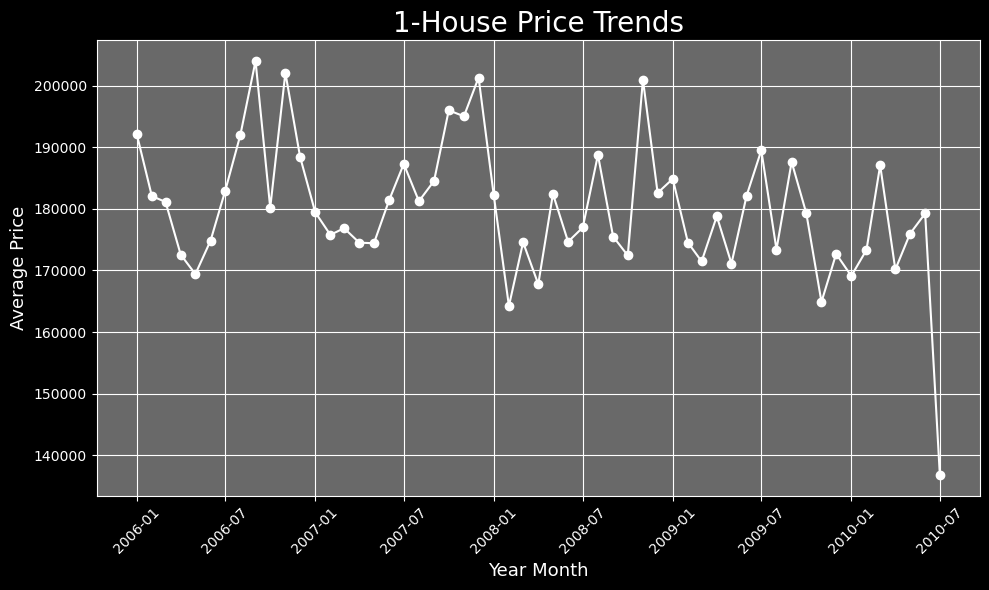

In [71]:
# 讀入Excel資料
data_file_path = r'E:/DataLearn/1.House/All_DataSheet.xlsx'
save_path = r'E:\DataLearn\1.House\GraphAnalysis\1-HousePriceTrends.png'
plot_average_price_trend(data_file_path, save_path)

### 由上圖可得知，美國愛荷華地區的房價，在2009年後，開始有往下滑的現象，而在2010下半年時出現雪崩